<a href="https://colab.research.google.com/github/SaraCordovaMero/nuevoProyecto/blob/main/M%C3%A9todo_Monte_Carlo_Sara_C%C3%B3rdova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
np.random.seed(1984)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")

In [ ]:
# Utilizando random para genera números aleatorios.
import random
random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [ ]:
random.random() # segundo llamado a random

0.49420568181919666

In [ ]:
for i in range(6):
    print(random.random()) # 5 números aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343
0.24405748180364206


In [ ]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


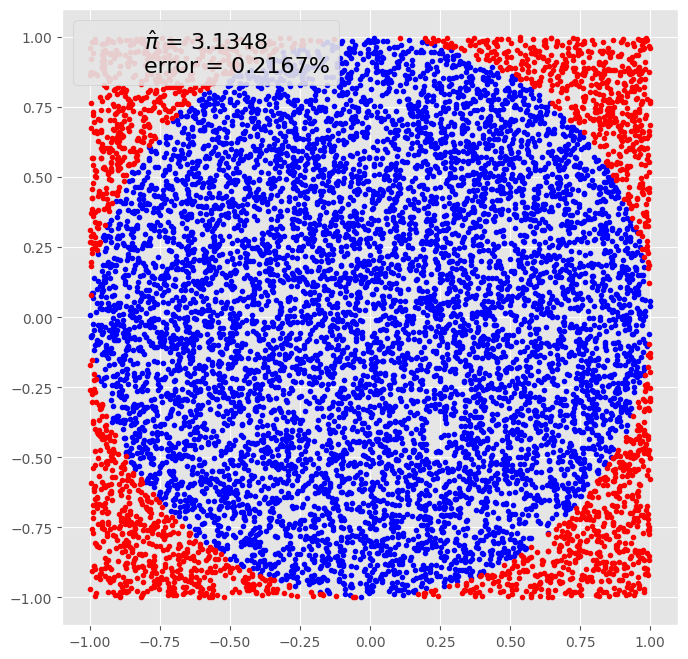

In [ ]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.
#ENCUENTRA UNA APROXIMACIÓN A PI
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

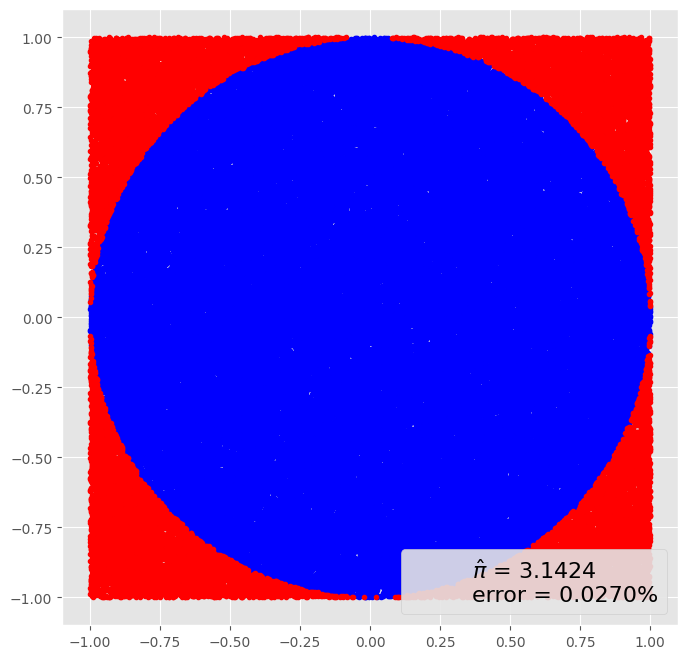

In [ ]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

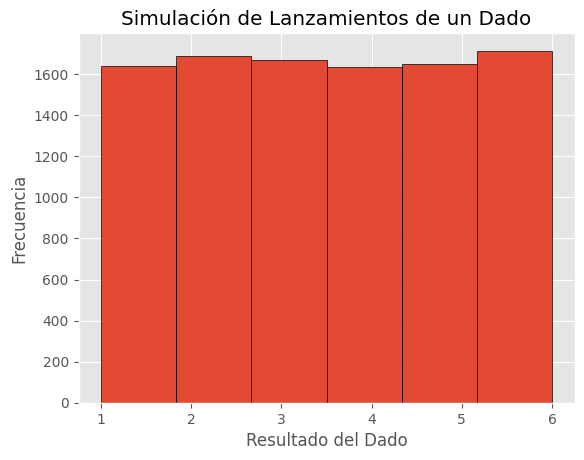

In [ ]:
# Simulación de lanzamiento de un dado 10,000 veces
resultados = np.random.randint(1, 7, 10000)

# Visualización de resultados
plt.hist(resultados, bins=6, edgecolor='black')
plt.title('Simulación de Lanzamientos de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.show()

[*********************100%***********************]  1 of 1 completed


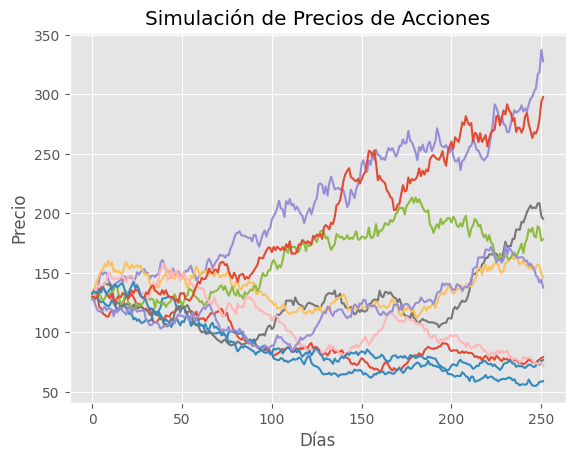

In [ ]:
# Descargar datos de una acción
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
precios = data['Adj Close'].values

# Simular trayectorias de precios usando Monte Carlo
S0 = precios[-1]  # Precio inicial
T = 252  # Días en un año
mu = np.mean(np.diff(np.log(precios)))  # Rentabilidad media
sigma = np.std(np.diff(np.log(precios)))  # Volatilidad
n_simulaciones = 1000  # Número de simulaciones
trayectorias = np.zeros((T, n_simulaciones))

for i in range(n_simulaciones):
    trayectorias[:, i] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * np.random.normal(size=T)))

# Visualizar algunas trayectorias
for i in range(10):
    plt.plot(trayectorias[:, i])

plt.title('Simulación de Precios de Acciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#CONECTAR A DRIVE E IMPORTAR EL DATASET
ruta = '/content/drive/MyDrive/Colab Notebooks/household_power_consumption.txt'
data = pd.read_csv(ruta)

In [18]:
data.head()

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...


In [23]:
# abrir el archivo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/household_power_consumption.txt', sep=';', low_memory=False)
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [24]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])

In [25]:
# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

In [26]:
# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-26-eefccd715a08>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [27]:
# tipo de dato que es date
print(df['Date'].dtype)

datetime64[ns]


In [28]:
# agrupar por día
daily_data = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()
print(daily_data.head())

Date
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64


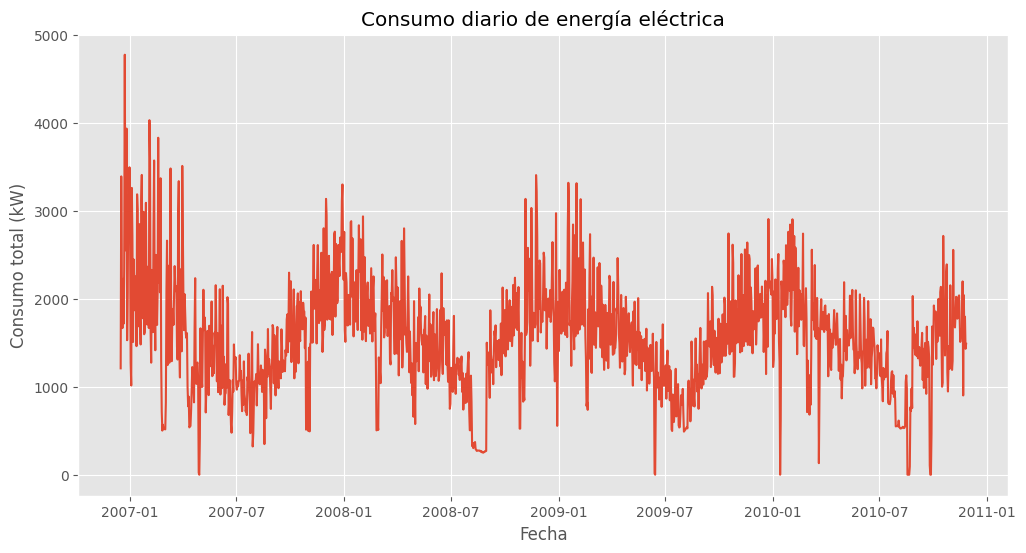

In [29]:
# prompt: graficar daily_data
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

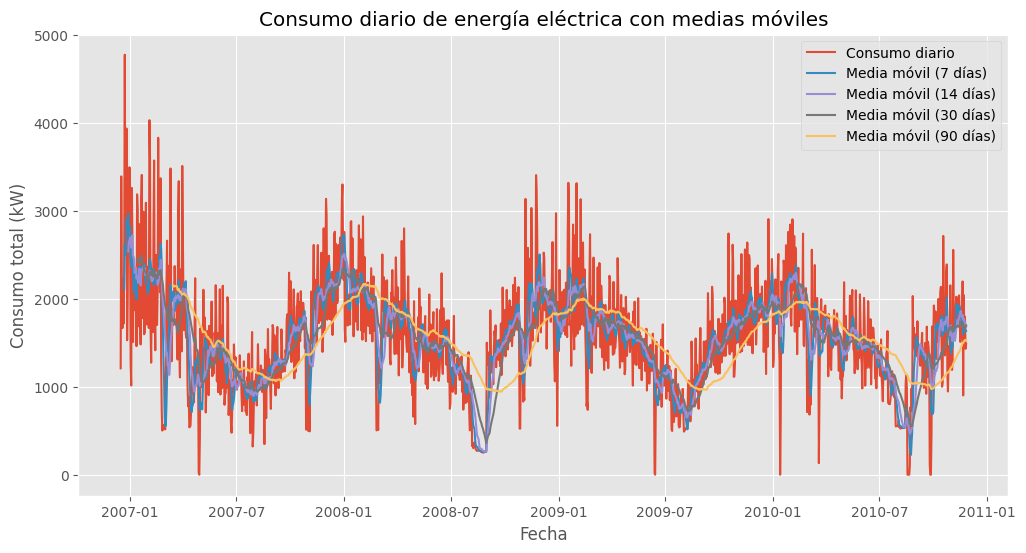

In [30]:
# calcular la media movil ideal
# Calcular la media móvil con diferentes ventanas
window_sizes = [7, 14, 30, 90]  # Diferentes tamaños de ventana para la media móvil
rolling_means = {}

for window_size in window_sizes:
    rolling_means[window_size] = daily_data.rolling(window=window_size).mean()

# Visualizar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')

for window_size, rolling_mean in rolling_means.items():
    plt.plot(daily_data.index, rolling_mean.values, label=f'Media móvil ({window_size} días)')

plt.title('Consumo diario de energía eléctrica con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# selecciona la mejor media movil menor a 90 respecto al error cuadratico
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio para cada media móvil
errors = {}
for window_size, rolling_mean in rolling_means.items():
  if window_size < 90:
    # Asegurarse de que los datos tengan el mismo tamaño
    valid_indices = rolling_mean.notna()
    rmse = mean_squared_error(daily_data[valid_indices], rolling_mean[valid_indices], squared=False)
    errors[window_size] = rmse

# Encontrar la media móvil con el menor error
best_window_size = min(errors, key=errors.get)
print(f"La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de {best_window_size} días.")

La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de 7 días.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# Hacer media móvil para n = 7
n = 7
k = len(daily_data.values)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(daily_data.values[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan,           nan, ..., 1676.54114286,
       1644.97142857, 1633.21485714])

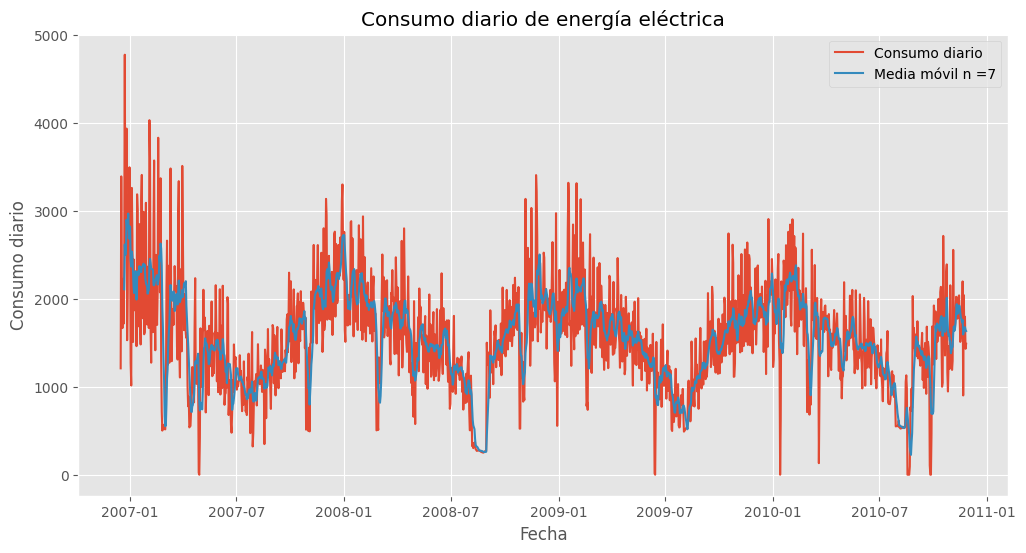

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')
plt.plot(daily_data.index, mmovil, label='Media móvil n =7')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
power=daily_data.values

In [35]:
# Estacionalidad
est = power - mmovil
est

array([          nan,           nan,           nan, ...,  119.70685714,
       -213.80742857, -145.11085714])

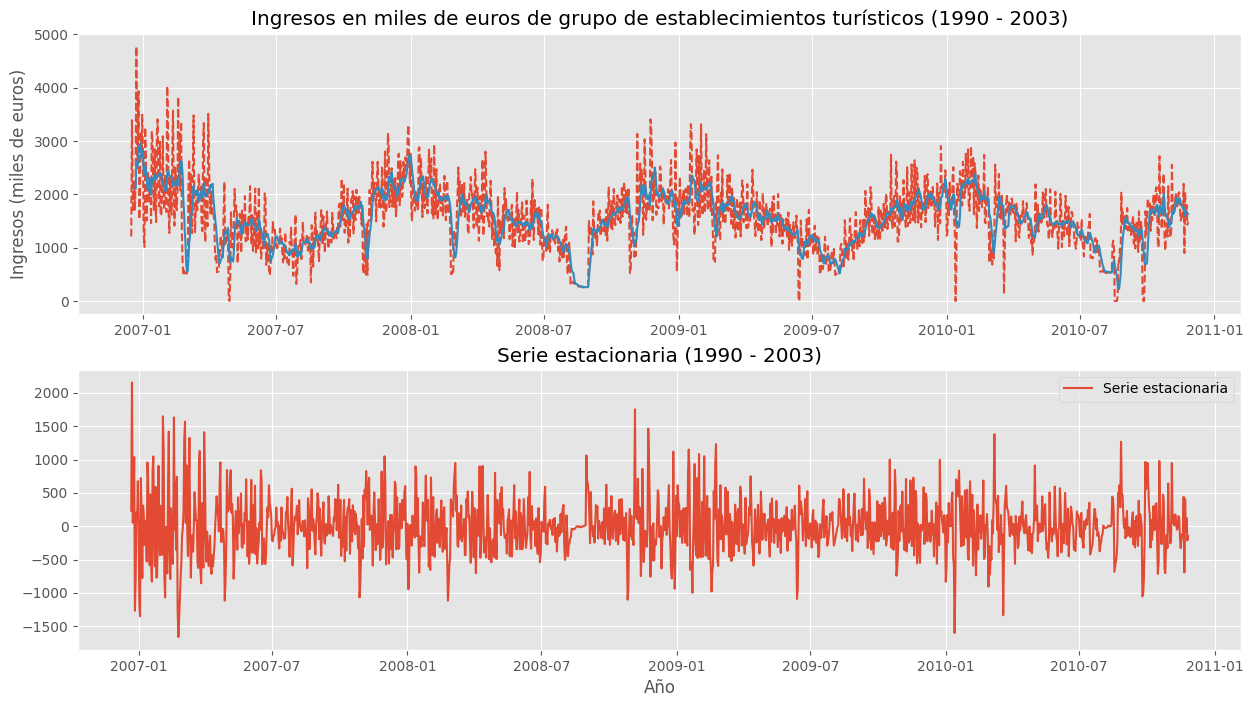

In [36]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(daily_data.index,power, '--', label='Ingresos')
plt.plot(daily_data.index,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(daily_data.index,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

In [37]:
import statsmodels.api as sm

# Replace 'freq' with 'period'
descomposicion = sm.tsa.seasonal_decompose(daily_data.values, model='additive', period=30)

In [38]:
# convertir daily_data en data frame

# Convertir daily_data a DataFrame
df_daily_data = pd.DataFrame({'Date': daily_data.index, 'Global_active_power': daily_data.values})
print(df_daily_data.head())

         Date  Global_active_power
0  2006-12-16             1209.176
1  2006-12-17             3390.460
2  2006-12-18             2203.826
3  2006-12-19             1666.194
4  2006-12-20             2225.748


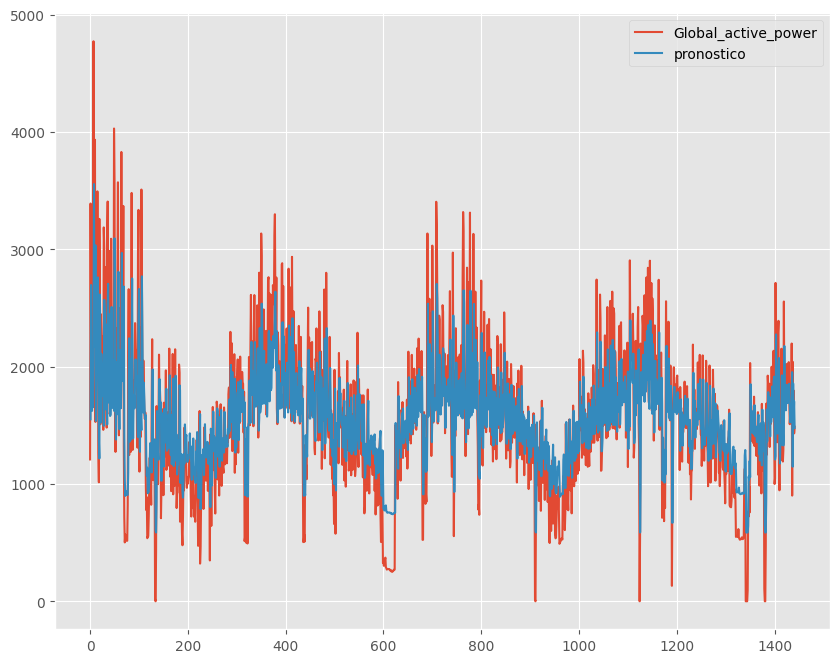

In [39]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df_daily_data['Global_active_power'].iloc[1:], order=(1,0,0))
resultados = modelo.fit()
df_daily_data['pronostico'] = resultados.fittedvalues
plot = df_daily_data[['Global_active_power', 'pronostico']].plot(figsize=(10, 8));

In [40]:
# Drop the first row containing NaN if present
df_daily_data.dropna(inplace=True)
rmse_arima = mean_squared_error(
    df_daily_data['Global_active_power'], df_daily_data['pronostico'], squared=False
)
print(f"El error cuadrático medio del modelo ARIMA es: {rmse_arima}")

El error cuadrático medio del modelo ARIMA es: 484.8738206283136


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
# Análisis preliminar
# Revisamos estadísticas clave de consumo de energía
mean_consumption = df['Global_active_power'].mean()  # Media
std_consumption = df['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption} kW")

Media del consumo de energía: 1.0916150365006245 kW
Desviación estándar del consumo de energía: 1.0572941610941602 kW


In [44]:
# Definir la simulación Monte Carlo
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()j

SyntaxError: invalid syntax (<ipython-input-44-00484286941a>, line 12)

In [45]:
# dataset con los datos simulados, convierte en dataset y coloca fechas, Empezar desde el día siguiente al último del dataset original

# Find the last date in the original dataset
last_date = df['Date'].max()

# Create a list of dates starting from the day after the last date
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Create a DataFrame with the simulated data and dates
df_simulated = pd.DataFrame({'Date': dates, 'Global_active_power': simulated_consumption})

# Print the simulated dataset with dates
print(df_simulated)

# Concatenate the original and simulated datasets if needed
# df_combined = pd.concat([df_daily_data, df_simulated], ignore_index=True)

NameError: name 'simulated_consumption' is not defined

In [46]:
# prompt: cambiar el nombre de la columna simulated_data por Global_active_power

# ... (Your existing code)

# Rename the column 'simulated_data' to 'Global_active_power'
# in df_simulated if it exists.
if 'simulated_data' in df_simulated.columns:
  df_simulated.rename(columns={'simulated_data': 'Global_active_power'}, inplace=True)

# ... (Rest of your code)

NameError: name 'df_simulated' is not defined

In [47]:
# prompt: concatenar las dos bases de datos

# Concatenate the original and simulated datasets
df_combined = pd.concat([df_daily_data, df_simulated], ignore_index=True)

# ... (Your existing code)

# Rename the column 'simulated_data' to 'Global_active_power'
# in df_simulated if it exists.
if 'simulated_data' in df_simulated.columns:
  df_simulated.rename(columns={'simulated_data': 'Global_active_power'}, inplace=True)

# ... (Rest of your code)

NameError: name 'df_simulated' is not defined

In [48]:
df_combined

NameError: name 'df_combined' is not defined